In [1]:
import pandas as pd
import numpy as np
#import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
!pip install pandas-datareader

In [3]:
import pandas_datareader.data as web

In [4]:
#Overnight Bank of Russia Rate = IRSTCB01RUM156N
#Consumer Price Index = RUSCPIALLMINMEI
#Unemployment rate = LMUNRRTTRUM156S
symbols = ['IRSTCB01RUM156N', 'RUSCPIALLMINMEI', 'LMUNRRTTRUM156S']

start = datetime.datetime(1999, 12, 1)
end = datetime.datetime(2019, 12, 1)
df = web.DataReader(symbols, 'fred', start, end)
print(df) 

            IRSTCB01RUM156N  RUSCPIALLMINMEI  LMUNRRTTRUM156S
DATE                                                         
1999-12-01            55.00        18.394634         1.705621
2000-01-01            45.00        18.823229         1.651943
2000-02-01            45.00        19.018990         1.586244
2000-03-01            33.00        19.140712         1.563414
2000-04-01            33.00        19.311064         1.486079
...                     ...              ...              ...
2019-08-01             7.25       119.516386         0.877503
2019-09-01             7.00       119.325160         0.868050
2019-10-01             6.50       119.480283         0.892843
2019-11-01             6.50       119.814828         0.931851
2019-12-01             6.25       120.246161         0.968209

[241 rows x 3 columns]


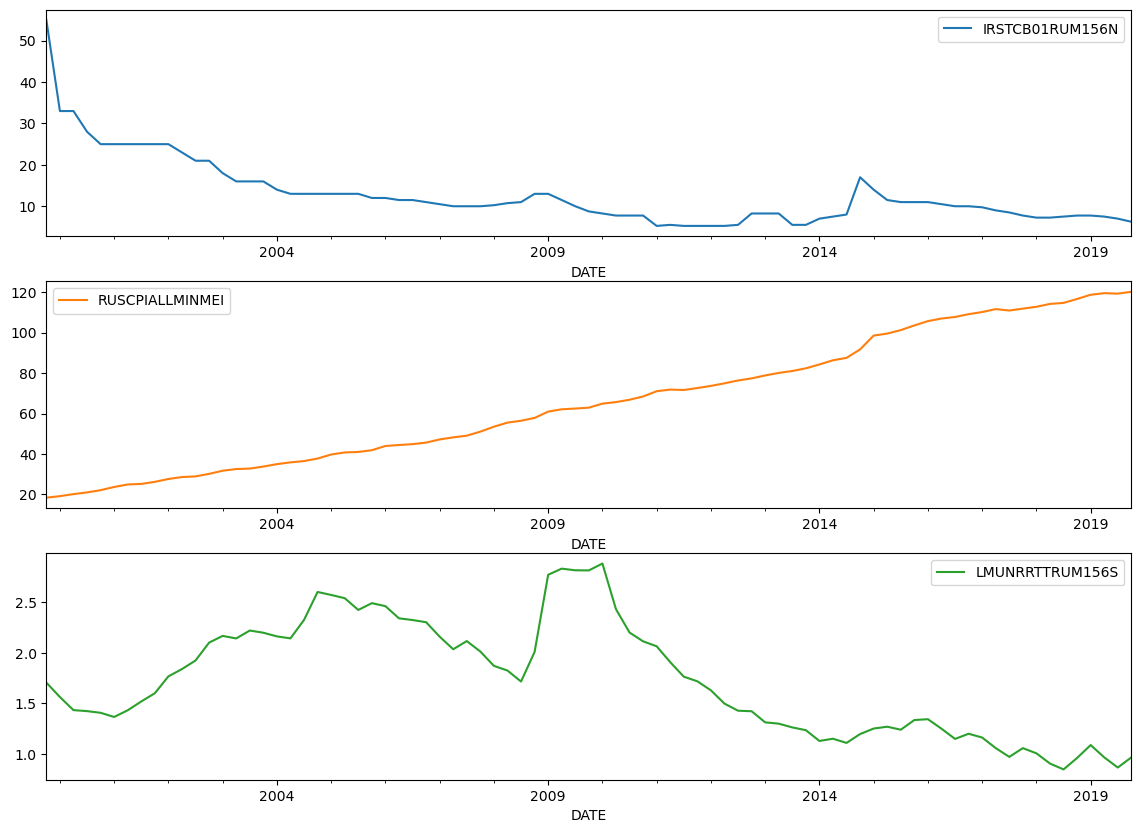

In [5]:
#Resample the data for quarters
df000 = df.resample('Q', convention='start').last().dropna()
df000.plot(subplots=True, layout=(3,1), figsize=(14,10), sharex=False, sharey=False)
plt.show()



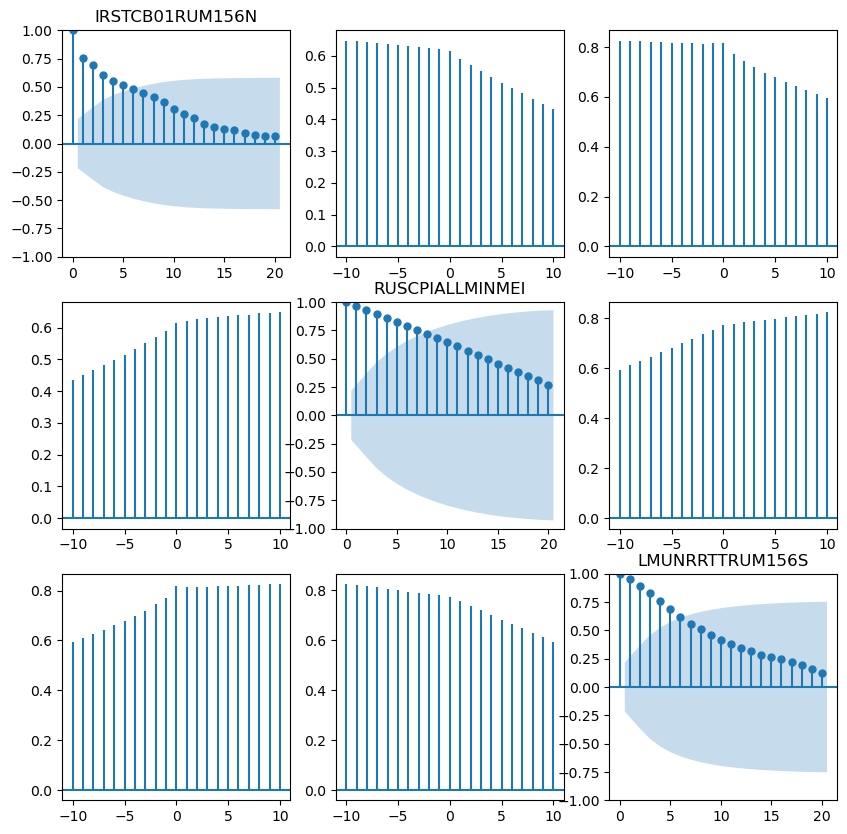

In [6]:
data = np.log(df000).diff().dropna()
#Analyze the structure of the series by plotting ACF and PACF functions 
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=False, figsize=(10, 10))
for i in range(len(symbols)):
    plot_acf(df000.values[:,i], 
    ax=axes[i,i], 
    label=symbols[i]); 
    axes[i,i].set_title(symbols[i])

axes[1, 0].xcorr(df000.values[:,1], df000.values[:,0])
axes[2, 0].xcorr(df000.values[:,2], df000.values[:,0])
axes[2, 1].xcorr(df000.values[:,2], df000.values[:,1])
axes[0, 1].xcorr(df000.values[:,0], df000.values[:,1])
axes[0, 2].xcorr(df000.values[:,0], df000.values[:,2])
axes[1, 2].xcorr(df000.values[:,1], df000.values[:,2])
plt.show()

In [7]:
#3.Propose a VAR(p) model (suppose we use p=2):
model = VAR(data)
results = model.fit(2)
#Alternatively if we want to obtain a suggestion on optimal VAR(p) order, uncomment and use the next 2 lines here
#model.select_order(15)
#results = model.fit(maxlags=15, ic='aic')
results.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, Mar, 2024
Time:                     21:46:37
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -17.0913
Nobs:                     78.0000    HQIC:                  -17.4718
Log likelihood:           380.275    FPE:                2.00635e-08
AIC:                     -17.7258    Det(Omega_mle):     1.55037e-08
--------------------------------------------------------------------
Results for equation IRSTCB01RUM156N
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -0.005186         0.033695           -0.154           0.878
L1.IRSTCB01RUM156N         0.083792         0.121706            0.688           0.491
L1.RUSCPIALLMINMEI        -1.2

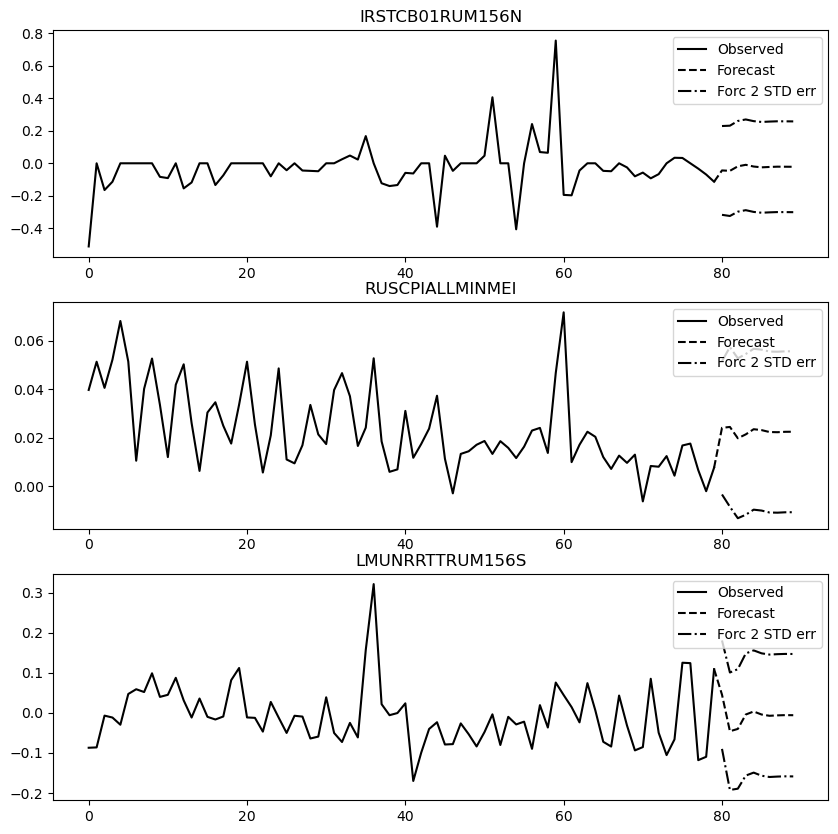

In [8]:
#4.Obtain a forecast for 10 next quarters:
lag_order = results.k_ar
results.forecast(data.values[-lag_order:], 10)
results.plot_forecast(10)
plt.show()

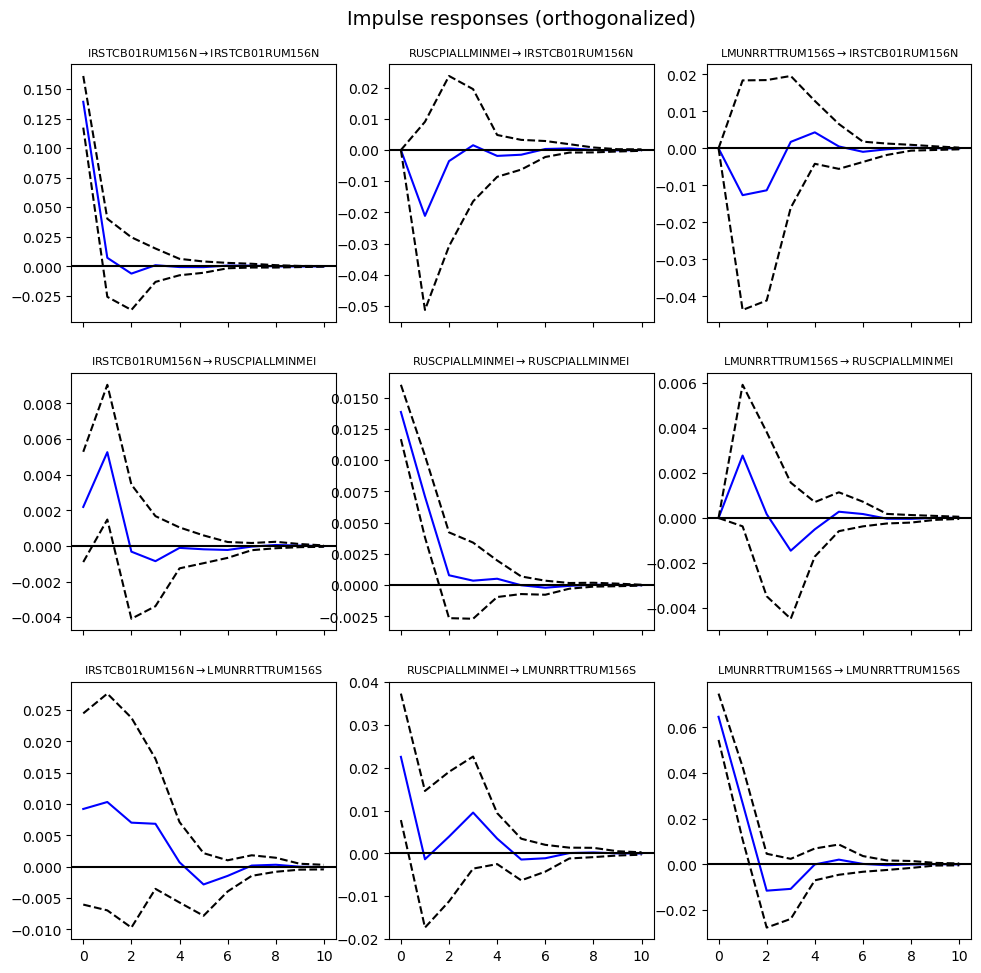

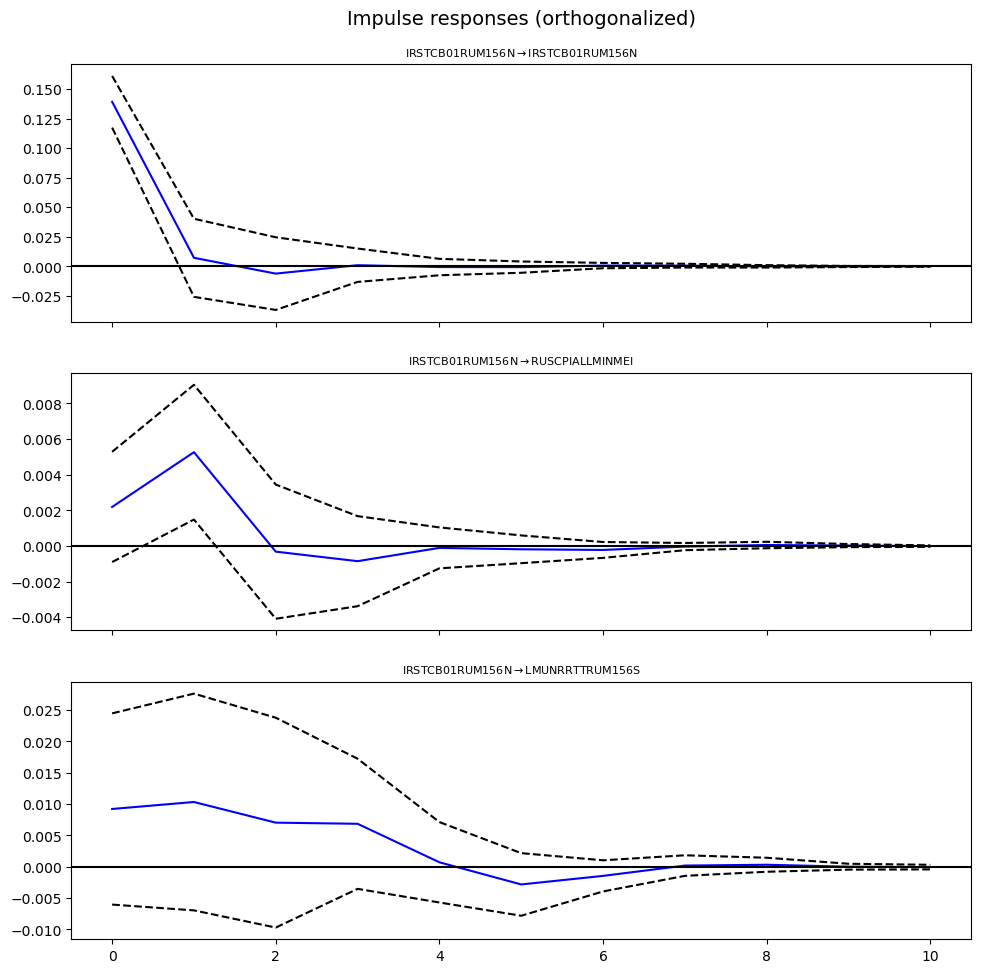

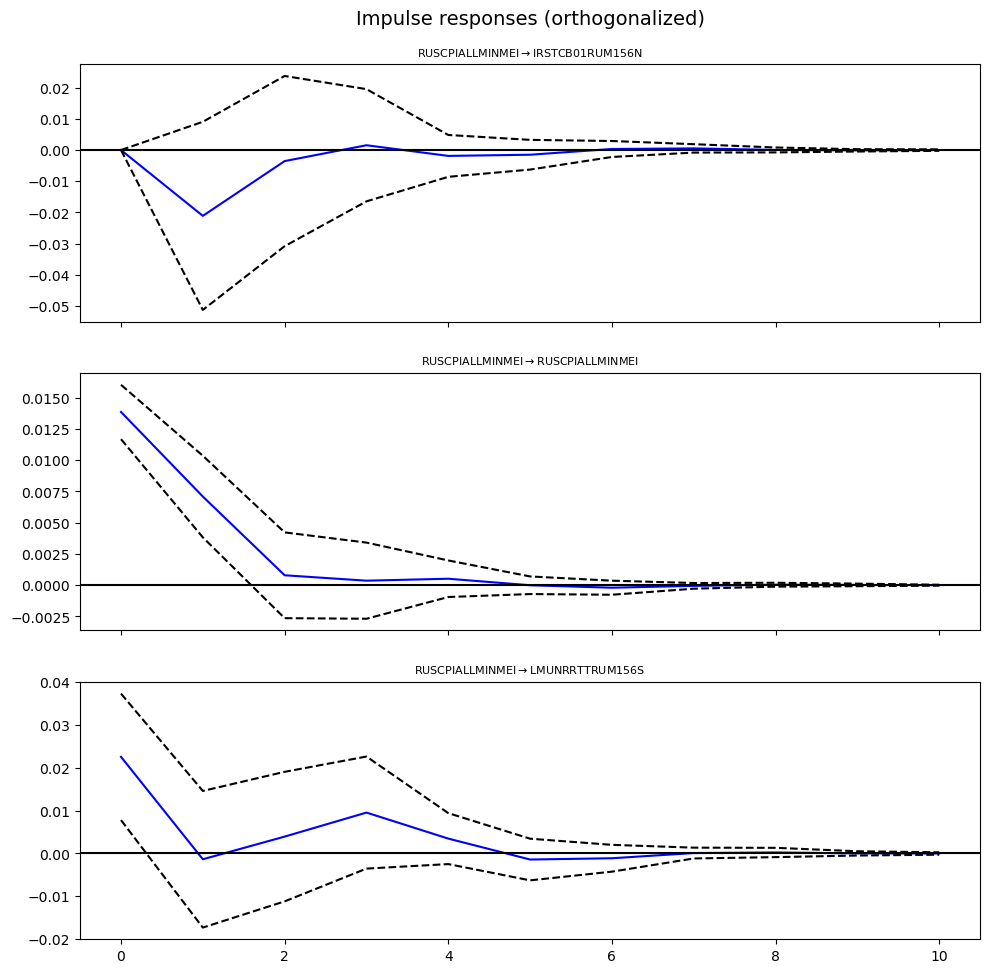

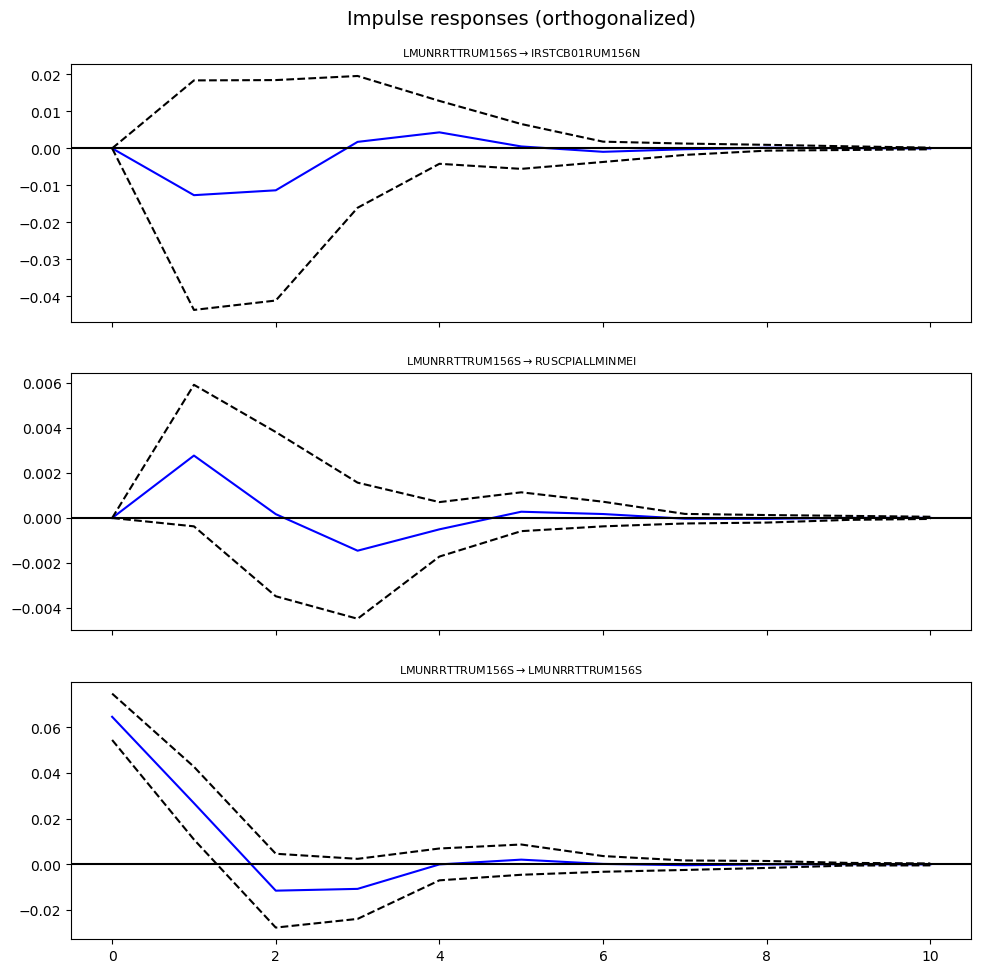

In [12]:
#5.Plot the Impulse Response Functions (IPFs) and analyze the results.
irf = results.irf(10) #для 10 периодов прогноза отклика
irf.plot(orth=True, subplot_params = {'fontsize': 8})
plt.show()

irf.plot(impulse='IRSTCB01RUM156N', orth=True, subplot_params = {'fontsize': 8})
plt.show()

irf.plot(impulse='RUSCPIALLMINMEI', orth=True, subplot_params = {'fontsize': 8})
plt.show()

irf.plot(impulse='LMUNRRTTRUM156S', orth=True, subplot_params = {'fontsize': 8})
plt.show()



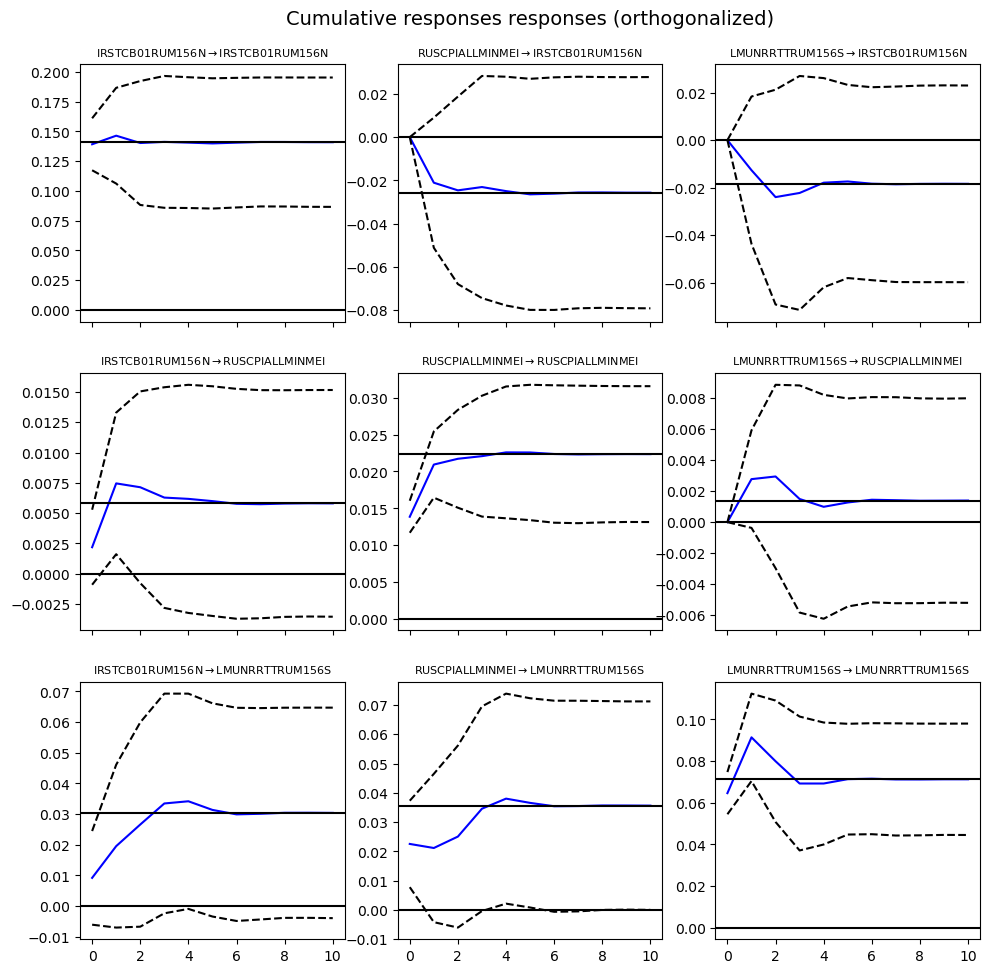

In [10]:
#Долгосрочные импульсные эффекты
plt.rcParams.update({'font.size': 10}) 

# Устанавливаем размер шрифта равным 10
irf.plot_cum_effects(orth=True, subplot_params = {'fontsize': 8}) 
plt.show()